# Boundary Value Solver

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.spatial.distance import euclidean

plt.rcParams['figure.figsize'] = (10,5)
np.set_printoptions(precision=2)

\begin{matrix} v'=v^2-\frac{11}{10}v+\frac 53e \\ e'=-\frac 12v^3+\frac{11}{10}v^2-\frac{33}{50}v+ve\text. \end{matrix}

![title](viz_mono.png)

## Problem 1
Determine the fixed points of the ODE system and classify their type.
To classify their type, state that the fixed point is a center, saddle, sink, etc.

$(v,e)$  
$(0,0)$ - spiral sink  
$(0.6, 0.18)$ - saddle  
$(1, 0.06)$ - source  

## Problem 2
Draw a phase portrait for the ODE system. Include fixed points, connecting orbits, and a few representative orbits.

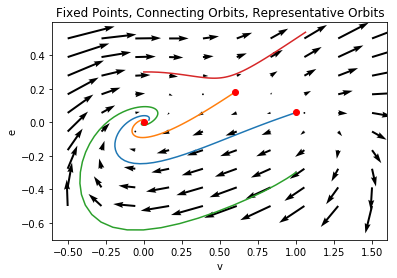

In [13]:
dv = lambda v, e: v**2 - 1.1*v + 5/3*e
de = lambda v, e: -0.5*v**3 + 1.1*v**2 - 0.66*v + v*e

α = 0.1

def solve_forward(v0, e0, n_forward=100):
    vs, es = [v0], [e0]
    v, e = v0, e0
    for i in range(n_forward):
        delta_v = dv(v, e)
        delta_e = de(v, e)
        v += α*delta_v
        e += α*delta_e
        vs.append(v)
        es.append(e)
    return vs, es
        

n_density = 10

fixed_points = np.array([
    [0, 0],
    [0.6, 0.18],
    [1, 0.06]
])

V = np.linspace(-0.5, 1.5, n_density)
E = np.linspace(-0.5, 0.5, n_density)
X, Y = np.meshgrid(V, E)

vs_1, es_1 = solve_forward(1, 0.059)
vs_2, es_2 = solve_forward(0.6, 0.179)
vs_3, es_3 = solve_forward(1, -0.3)
vs_4, es_4 = solve_forward(0, 0.3, n_forward=40)

plt.quiver(X, Y, dv(X,Y), de(X,Y))
plt.plot(vs_1, es_1)
plt.plot(vs_2, es_2)
plt.plot(vs_3, es_3)
plt.plot(vs_4, es_4)
plt.scatter(fixed_points[:,0], fixed_points[:,1], color='red', zorder=3)
plt.xlabel("v")
plt.ylabel("e")
plt.title("Fixed Points, Connecting Orbits, Representative Orbits")
plt.show()

## Problem 3 & 4
Develop from scratch an ODE boundary solver.
Use your ODE boundary solver to solve for any connecting orbits present in the phase diagram.

Why does gradient explosion depend on the time linspace?
Because $dv, de$ are actually $\frac{dv}{dt}, \frac{de}{dt}$.

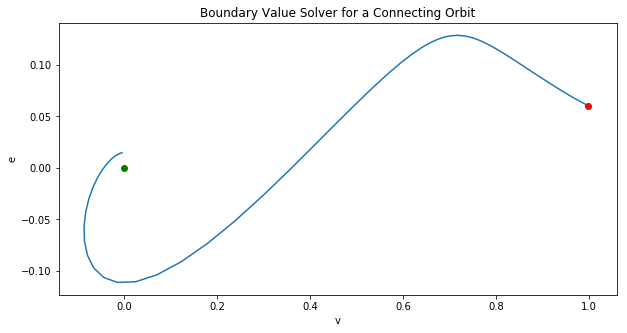

In [138]:
# Define ODE
def fun(t, y):
    v, e = y
    delta_v = dv(v, e)
    delta_e = de(v, e)
    ret_val = np.vstack([delta_v, delta_e])
    return ret_val

v0, e0 = 1, 0.059
vn, en = 0, 0.01
# Define boundary condition residual
def bcs(ya, yb):
    return np.array([ya[0]-v0 + ya[1]-e0, yb[0]-vn + yb[1]-en])

# Init time and boundary conditions
t = np.linspace(0, 20, 100)
bc = np.array([v0, e0])
y = bc.reshape((-1,1)) * np.ones((2,len(t)))

# Solve the ODE
solution = solve_bvp(fun=fun, bc=bcs, x=t, y=y)

# Plot it all
plt.plot(solution.sol(t)[0], solution.sol(t)[1])
plt.scatter(solution.sol(t)[0][0], solution.sol(t)[1][0], color='red', zorder=3)
plt.scatter([0], [0], color='green')
plt.xlabel("v")
plt.ylabel("e")
plt.title("Boundary Value Solver for a Connecting Orbit")
plt.show()

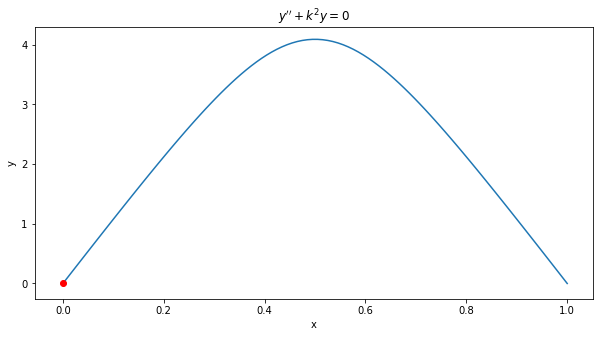

In [173]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(0, 1, 100)
y = np.zeros((2, x.size))
y[0] = 3
# print(y)

sol = solve_bvp(fun, bc, x, y).sol(x)
# print(sol)

plt.plot(x, sol[0])
# plt.plot(x, sol[1])
plt.scatter(x[0], sol[0][0], color='red', zorder=3)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$y'' + k^2y = 0$")
plt.show()

[0. 0.]


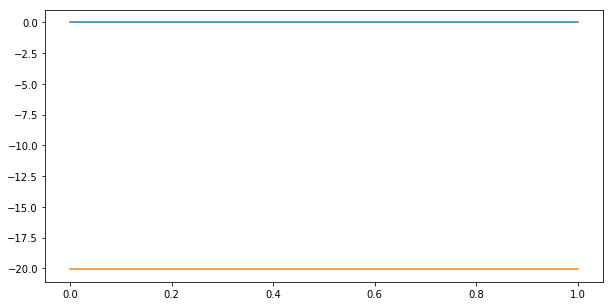

In [194]:
def interpolate_derivatives(fun, x):
    """
    fun = y'(x)
    """
    y_prime = fun(x, y)

def my_solve_bvp(fun, bc, x, y):
    """
    x ((m,) ndarray): the points to interpolate the derivative at.
    y ((n,m) ndarray): the solution estimate at the mesh nodes.
    """
    # We'll gather the derivatives at a linspace of points.
    y_prime = fun(x, y)
    # We'll interpolate the points with a polynomial.
    deg = len(X)-1
    dy_p = np.polyfit(x, y_prime[0], deg=deg)
    dy_poly = lambda t: np.array([np.sum([dy_p[i]*x**(deg-i) for i in range(len(X))]) for x in t])
    # We'll interpolate the polynomial.
#     print(y)
#     print(y_prime)

    print(dy_poly(np.array([1, 2])))
    
    t = np.linspace(x[0], x[-1], 100)
    plt.plot(t, dy_poly(t))
    plt.plot(x, y_prime[1])
    plt.show()
    

my_solve_bvp(fun, bc, x, y)